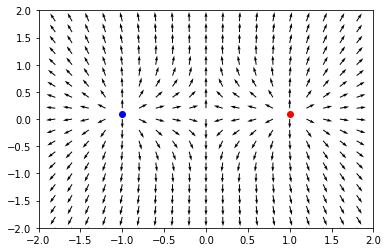

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Tratar de maximizar el uso de  np.Arrays, evitar usar Arrays
# Objetivo 1 ( Campo Magnetico )

k = 1


def CampoM(q, r, charge):
    """
    Magnitud del campo

    """
    global k
    
    if  charge:
        return k*q/r**2

    return -k*q/r**2


def E_Field(rsource, rp, charge):
    """
    Parameter
    ---------
    rsource: numpy array de 2D, con la posicion de la fuente
    rp     : numpy array de 2D, El punto donde se encontrará el campo

    Return
    ---------
    Ex: Componente x del campo electrico
    Ey: Componente y del campo electrico 
    """
    
    Delta_R = rp-rsource  # Resta de vectores Numpy
    MagDelta_R = np.sqrt(Delta_R[0]**2+Delta_R[1]**2)  # Magnitud del vector
    u_R = Delta_R/MagDelta_R
    E = CampoM(1, MagDelta_R,charge==1) * u_R
    return E[0], E[1]


r_source = {"q1": np.array([-1, 0.1]), "q2": np.array([1, 0.1])}

x = np.arange(-2, 2, 0.2)
n1 = len(x)
y = np.arange(-2, 2, 0.2)
n2 = len(y)

rp = np.zeros((n1*n2, 2))
T = 0
for x_ in x:
    for y_ in y:
        # Crear el grid con los valores de x,y de las cargas
        rp[T] = np.array([x_, y_])
        T += 1

E1 = np.zeros((n1*n2, 2))
E2 = np.zeros((n1*n2, 2))
E = np.zeros((n1*n2, 2))
for i in range(0, len(rp)):

    E1[i] = E_Field(r_source["q1"], rp[i],1)     # El campo de cada carga
    
    E2[i] = E_Field(r_source["q2"], rp[i],1)

    
    E[i] = np.array(np.array([E1[i][0]+E2[i][0], E1[i][1]+E2[i][1]]))
    mod = (E[i][0]**2+E[i][1]**2)**0.5
    E[i] = np.array([E[i][0]/mod,E[i][1]/mod])


plt.xlim(-2,2)
plt.ylim(-2,2)
plt.plot(r_source["q1"][0], r_source["q1"][1], "bo")
plt.plot(r_source["q2"][0], r_source["q2"][1], "ro")
plt.quiver(rp[:, 0], rp[:, 1], E[:, 0], E[:, 1])

In [8]:
import numpy as np
import matplotlib.pyplot as plt
# Modelo cinematica encestar

g = 9.8


def Position(d, v0, theta, t):
    global g

    x = v0*np.cos(theta)*t
    y = v0*np.sin(theta)*t-((1/2)*g*(t**2))

    return [x, y]


def Cesta(d, v0, theta, h):
    """
    d = Distance
    V0 = Initial velocity
    Theta = Angle
    h = height
    Output

    Wait
    """
    global g

    xmax = (v0**2)*np.sin(2*theta)/(g)
    if xmax < d:
        return " Tiro muy debil :/"
    timef = 2*v0*np.sin(theta)/g
    counter = np.arange(0, timef, 0.01)
    epsilon = 0.02

    for i in range(0, len(counter)):

        Pos = Position(d, v0, theta, counter[i])
        
        if Pos[0] > d-epsilon and Pos[0] < d+epsilon:
            if Pos[1] > h-epsilon and Pos[1] < h+epsilon:
                if Position(d, v0, theta, counter[i+1])[1] < Pos[1]:
                    return "¡Cesta! :)"
    return "Demasiado fuerte :/"


print(Cesta(36.35, 20, np.pi/4, 4))

print(Cesta(1, 2, np.pi/4, 4))

¡Cesta! :)
 Tiro muy debil :/
